In [1]:
# specify id
y_id = 1
track_id = 2
server = 4

In [10]:
# import module
import sys
sys.path.insert(0, '../')
from utils.training_utils import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# load datas
test_x, train_x, train_y = load_data(y_id)
print(test_x.shape, train_x.shape, train_y.shape)

(2500, 10000) (47500, 10000) (47500,)


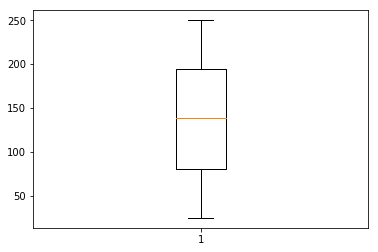

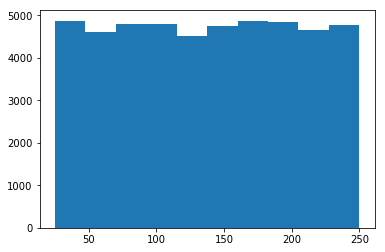

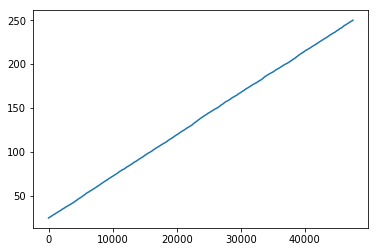

[122.28576511 177.30364034 247.92357697 ... 217.54283184 118.53941496
  45.97535738]


,0
count,47500.000000
mean,137.616182
std,65.108089
min,25.010878
25%,81.045489
50%,138.498665
75%,194.172346
max,249.963839


In [11]:
# draw distribution of y1
plt.boxplot(train_y)
plt.show()
plt.hist(train_y)
plt.show()
x = sorted(train_y)
plt.plot(x)
plt.show()
print(train_y)
d = pd.DataFrame(train_y)
d.describe()

In [4]:
# pick only important data
idx = []
with open('../29/adaboost' + str(y_id) + '_feature.csv', 'r') as f:
    i = 0
    for lines in f:
        importance = float(lines.replace('\n', '').split(',')[y_id])
        if(np.abs(importance) > 1e-9):
            idx.append(i)
        i += 1
train_x = train_x[:, idx]
test_x = test_x[:, idx]
print(train_x.shape)

(47500, 95)


In [3]:
# specify parameters
params = {
    'booster': ['dart'],
    'n_estimators': [500],
    'max_depth': [9],
    'subsample': [0.75, 0.5],
    'learning_rate': [0.1], 
    'tree_method': ['hist', 'auto']
}

In [5]:
# define my own scorer
from sklearn.metrics import make_scorer

def scorer(y, y_pred):
    return -np.sum(np.abs(y - y_pred) / y) / len(y)

In [8]:
# create GridSearchCV
model = GridSearchCV(estimator=XGBRegressor(verbosity=2, n_jobs=8), 
                     param_grid=params, 
                     scoring=make_scorer(scorer),
                     cv=3,
                     verbose=20,
                     n_jobs=4,
                     return_train_score=True)

In [9]:
# train
model.fit(train_x, train_y)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    5.7s
/usr/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done 

[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:  7.0min
[Parallel(n_jobs=4)]: Done 131 tasks      | elapsed:  7.0min
[Parallel(n_jobs=4)]: Done 132 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done 133 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done 134 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done 135 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:  7.2min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  7.2min
[Parallel(n_jobs=4)]: Done 138 tasks      | elapsed:  7.2min
[Parallel(n_jobs=4)]: Done 139 tasks      | elapsed:  7.2min
[Parallel(n_jobs=4)]: Done 140 tasks      | elapsed:  7.2min
[Parallel(n_jobs=4)]: Done 141 tasks      | elapsed:  7.3min
[Parallel(n_jobs=4)]: Done 142 tasks      | elapsed:  7.3min
[Parallel(n_jobs=4)]: Done 143 tasks      | elapsed:  7.3min
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:  7.3min
[Parallel(n_jobs=4)]: Done 145 tasks      | elapsed:  7.4min
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 265 tasks      | elapsed: 15.2min
[Parallel(n_jobs=4)]: Done 266 tasks      | elapsed: 15.4min
[Parallel(n_jobs=4)]: Done 267 tasks      | elapsed: 15.4min
[Parallel(n_jobs=4)]: Done 268 tasks      | elapsed: 15.5min
[Parallel(n_jobs=4)]: Done 269 tasks      | elapsed: 15.6min
[Parallel(n_jobs=4)]: Done 270 tasks      | elapsed: 15.6min
[Parallel(n_jobs=4)]: Done 271 tasks      | elapsed: 15.7min
[Parallel(n_jobs=4)]: Done 272 tasks      | elapsed: 15.7min
[Parallel(n_jobs=4)]: Done 273 tasks      | elapsed: 15.7min
[Parallel(n_jobs=4)]: Done 274 tasks      | elapsed: 15.8min
[Parallel(n_jobs=4)]: Done 275 tasks      | elapsed: 15.8min
[Parallel(n_jobs=4)]: Done 276 tasks      | elapsed: 15.8min
[Parallel(n_jobs=4)]: Done 277 tasks      | elapsed: 15.8min
[Parallel(n_jobs=4)]: Done 278 tasks      | elapsed: 15.9min
[Parallel(n_jobs=4)]: Done 279 tasks      | elapsed: 15.9min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed: 15.9min
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 400 tasks      | elapsed: 26.9min
[Parallel(n_jobs=4)]: Done 401 tasks      | elapsed: 27.0min
[Parallel(n_jobs=4)]: Done 402 tasks      | elapsed: 27.0min
[Parallel(n_jobs=4)]: Done 403 tasks      | elapsed: 27.1min
[Parallel(n_jobs=4)]: Done 404 tasks      | elapsed: 27.1min
[Parallel(n_jobs=4)]: Done 405 tasks      | elapsed: 27.3min
[Parallel(n_jobs=4)]: Done 406 tasks      | elapsed: 27.3min
[Parallel(n_jobs=4)]: Done 407 tasks      | elapsed: 27.3min
[Parallel(n_jobs=4)]: Done 408 tasks      | elapsed: 27.3min
[Parallel(n_jobs=4)]: Done 409 tasks      | elapsed: 27.5min
[Parallel(n_jobs=4)]: Done 410 tasks      | elapsed: 27.5min
[Parallel(n_jobs=4)]: Done 411 tasks      | elapsed: 27.6min
[Parallel(n_jobs=4)]: Done 412 tasks      | elapsed: 27.6min
[Parallel(n_jobs=4)]: Done 413 tasks      | elapsed: 27.7min
[Parallel(n_jobs=4)]: Done 414 tasks      | elapsed: 27.8min
[Parallel(n_jobs=4)]: Done 415 tasks      | elapsed: 29.5min
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 535 tasks      | elapsed: 52.7min
[Parallel(n_jobs=4)]: Done 536 tasks      | elapsed: 52.7min
[Parallel(n_jobs=4)]: Done 537 tasks      | elapsed: 53.1min
[Parallel(n_jobs=4)]: Done 538 tasks      | elapsed: 53.2min
[Parallel(n_jobs=4)]: Done 539 tasks      | elapsed: 53.4min
[Parallel(n_jobs=4)]: Done 540 tasks      | elapsed: 53.5min
[Parallel(n_jobs=4)]: Done 541 tasks      | elapsed: 53.6min
[Parallel(n_jobs=4)]: Done 542 tasks      | elapsed: 53.6min
[Parallel(n_jobs=4)]: Done 543 tasks      | elapsed: 53.6min
[Parallel(n_jobs=4)]: Done 544 tasks      | elapsed: 53.6min
[Parallel(n_jobs=4)]: Done 545 tasks      | elapsed: 53.7min
[Parallel(n_jobs=4)]: Done 546 tasks      | elapsed: 53.7min
[Parallel(n_jobs=4)]: Done 547 tasks      | elapsed: 53.8min
[Parallel(n_jobs=4)]: Done 548 tasks      | elapsed: 53.8min
[Parallel(n_jobs=4)]: Done 549 tasks      | elapsed: 53.8min
[Parallel(n_jobs=4)]: Done 550 tasks      | elapsed: 53.9min
[Parallel(n_jobs=4)]: Do

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=8,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, verbosity=2),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'booster': ['gbtree', 'dart'], 'n_estimators': [50, 100, 500], 'max_depth': [3, 6], 'subsample': [0.25, 0.5, 0.75], 'learning_rate': [0.1, 0.05, 0.01], 'tree_method': ['hist', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(scorer), verbose=20)

In [17]:
# write files
write_prediction('train_y' + str(y_id) + '_' + str(track_id) + '.txt', 'w', model.predict(train_x).reshape((47500, 1)).astype('str'))
write_prediction('test_y' + str(y_id) + '_' + str(track_id) + '.txt', 'w', model.predict(test_x).reshape((2500, 1)).astype('str'))

In [18]:
print(err1_calc(model.predict(train_x), train_y, y_id))

4.693246130811931


In [20]:
print(err2_calc(model.predict(train_x), train_y))

0.03947935747035039


In [21]:
print(model.best_estimator_)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=9,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=8,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.75, tree_method='auto', verbosity=2)


In [22]:
print(model.best_score_)

-0.15273723377333948
